# Analyse des Verhaltens von Benutzer 69

Das Verhalten des definierten Benutzers wird nachfolgend im Kontext verschiedener Merkmale und Zeiträume betrachtet.

**Vermutlicher Status**
Student im Bachelor-Studiengang Wirtschaftsinformatik Online (BWINF)

### Definition des Benutzers

In [34]:
specified_user = 69

### Import von Bibliotheken und anderen Erweiterungen

In [35]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [36]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [37]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [38]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [39]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [40]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer bestimmten userid
moodle_data = moodle_data[moodle_data.userid == specified_user]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
21120,0,0,69,-2,sent,\core\event\notification_sent,notifications,3418388,2020-11-06 12:17:02,,0
62538,0,0,69,0,loggedin,\core\event\user_loggedin,user,38316,2020-10-14 07:36:40,,0
62539,0,0,69,69,viewed,\core\event\dashboard_viewed,,0,2020-10-14 07:36:40,,0
62540,27660,1,69,0,viewed,\core\event\course_viewed,,0,2020-10-14 07:37:17,,0
63131,0,0,69,0,loggedin,\core\event\user_loggedin,user,38316,2020-10-15 06:31:54,,0
...,...,...,...,...,...,...,...,...,...,...,...
967840,28233,1,69,0,viewed,\mod_assign\event\submission_status_viewed,,0,2021-06-03 20:28:11,,0
967841,28233,1,69,0,viewed,\core\event\course_viewed,,0,2021-06-03 20:28:14,,0
967842,0,0,69,0,failed,\core\event\user_login_failed,,0,2021-06-03 20:28:31,,0
967843,0,0,69,69,viewed,\core\event\dashboard_viewed,,0,2021-06-03 20:28:34,,0


### Menge der unterschiedlichen Werte pro Tabellenmerkmal

In [41]:
attributes = moodle_data.nunique()
display(attributes)

courseid                16
Studiengang              2
userid                   1
relateduserid           25
action                  15
eventname               51
objecttable             30
objectid               663
timecreated           8261
course_module_type       1
instanceid               2
dtype: int64

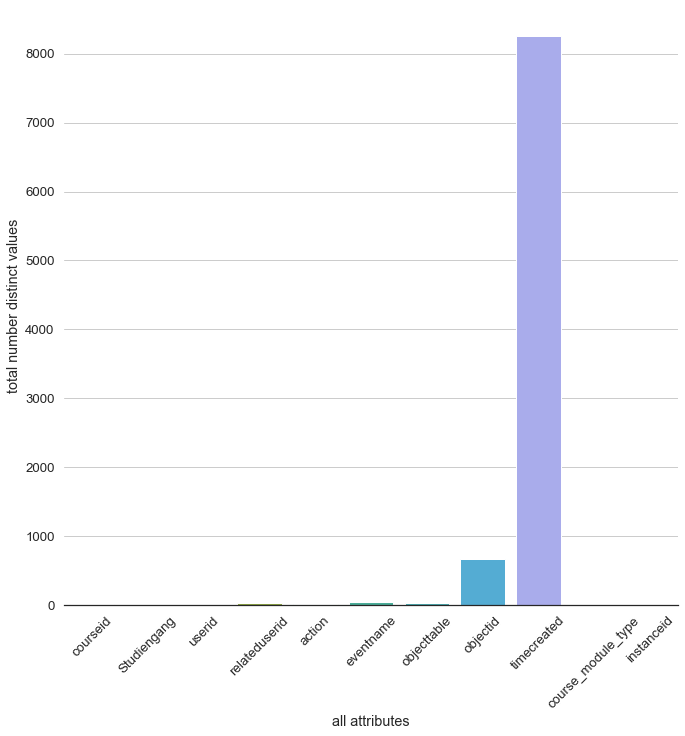

In [42]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
result = attributes
# Visualisierung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Studiengang

In [43]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    2204
1    7552
Name: Studiengang, dtype: int64

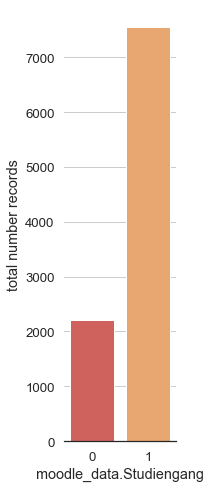

In [44]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Log-Einträge pro Studiengang
result = studies
# Visualisierung der Menge der Log-Einträge pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Kurs

In [45]:
courses = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(courses.sort_values())

courseid
25869       2
627         3
25872       4
1           7
1750        9
25871      17
26744      18
26741      36
629       343
28235     377
28482     434
27660     804
28233    1227
27419    2072
0        2188
27421    2215
Name: courseid, dtype: int64

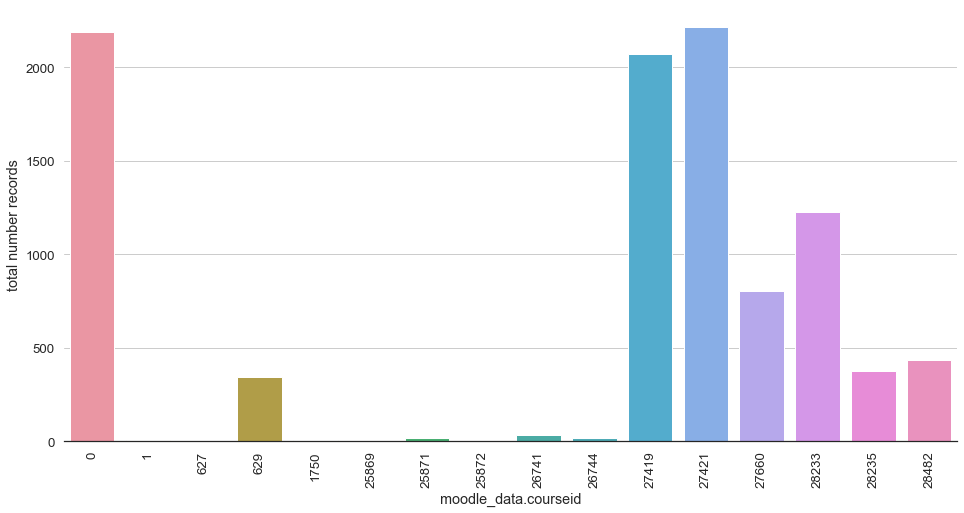

In [46]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(courses.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Kurs
result = courses
# Visualisierung der Menge der Log-Einträge pro Kurs
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Action

In [47]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
accepted         4
added            1
created         63
duplicated       1
failed          73
graded          16
loggedin       760
loggedout        7
reviewed         6
sent           136
started         34
submitted       78
updated         15
uploaded        55
viewed        8507
Name: action, dtype: int64

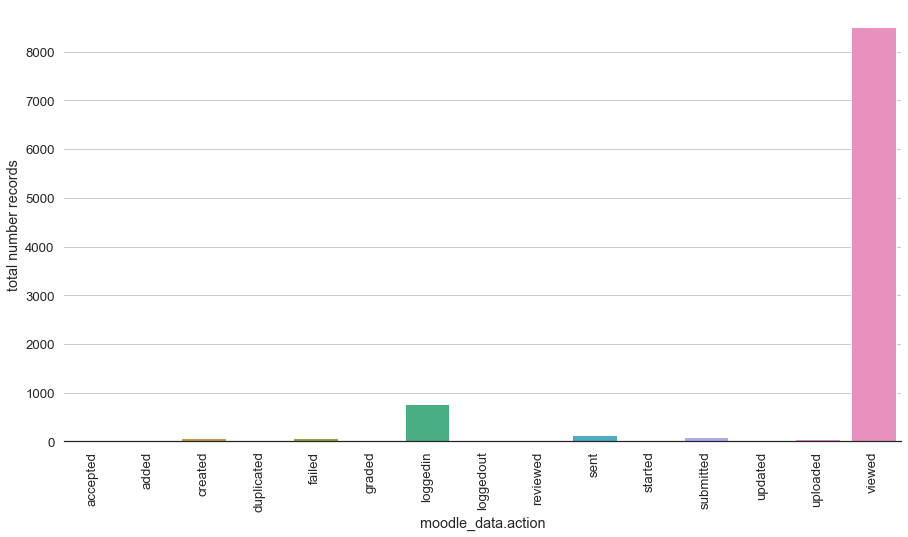

In [48]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(actions.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Action
result = actions
# Visualisierung der Menge der Log-Einträge pro Action
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Eventname

In [49]:
eventtypes = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventtypes)

eventname
\assignsubmission_comments\event\comment_created       1
\assignsubmission_file\event\assessable_uploaded      42
\assignsubmission_file\event\submission_created       37
\assignsubmission_file\event\submission_updated        5
\core\event\calendar_event_created                     1
\core\event\calendar_event_updated                     7
\core\event\course_category_viewed                    10
\core\event\course_user_report_viewed                 10
\core\event\course_viewed                           2881
\core\event\dashboard_viewed                        1192
\core\event\message_sent                               5
\core\event\message_viewed                             5
\core\event\notification_sent                        131
\core\event\user_graded                               16
\core\event\user_loggedin                            760
\core\event\user_loggedout                             7
\core\event\user_login_failed                         73
\core\event\user_prof

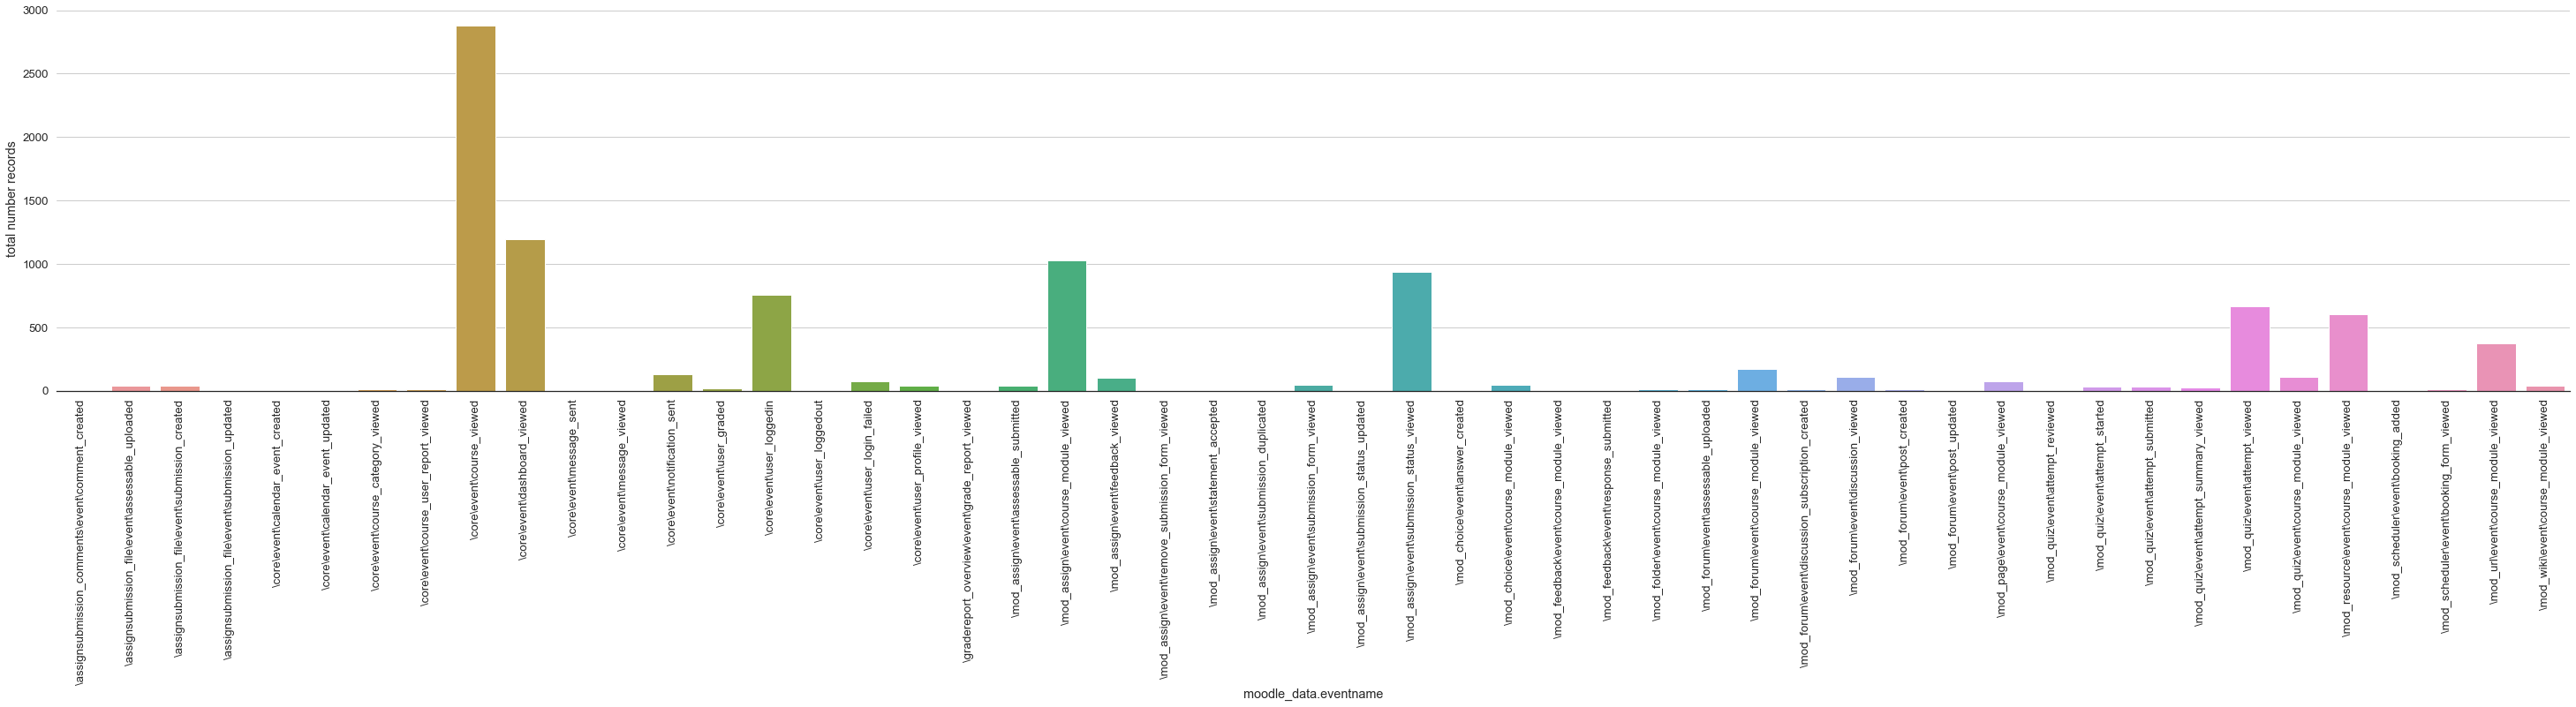

In [50]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(eventtypes.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Eventname
result = eventtypes
# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Objecttable

In [51]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                         5147
assign                   1028
assign_grades             101
assign_submission          91
assignsubmission_file      42
choice                     44
choice_answers              3
comments                    1
course_categories          10
event                       8
feedback                    2
feedback_completed          2
folder                     15
forum                     172
forum_discussion_subs      10
forum_discussions         112
forum_posts                26
grade_grades               16
message_user_actions        5
messages                    5
notifications             131
page                       73
quiz                      113
quiz_attempts             768
resource                  604
scheduler                   9
scheduler_slots             1
url                       371
user                      804
wiki                       42
Name: objecttable, dtype: int64

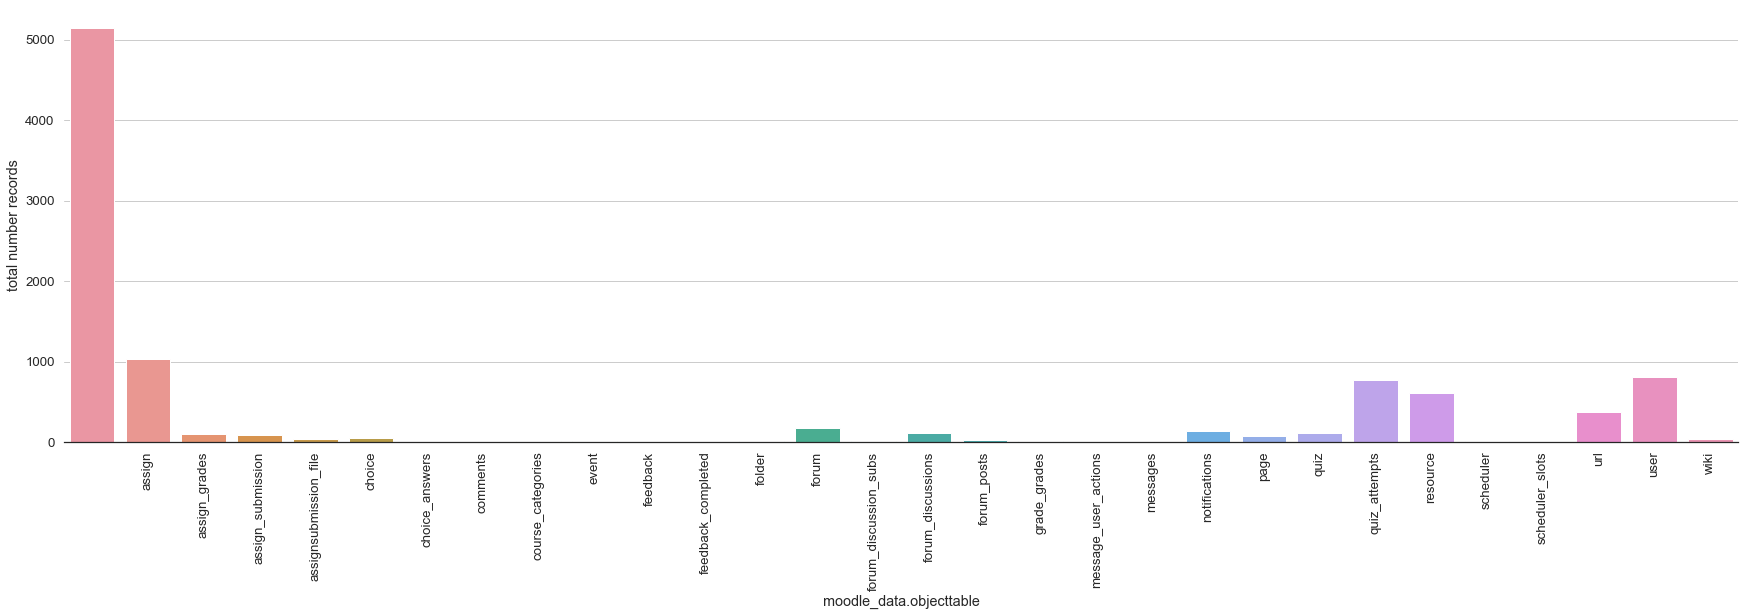

In [52]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(objecttables.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Objecttable
result = objecttables
# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Coursemoduletype

In [53]:
course_module_types = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(course_module_types)

course_module_type
    9756
Name: course_module_type, dtype: int64

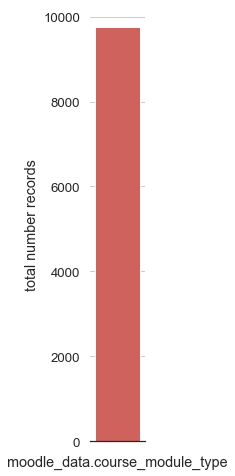

In [54]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(course_module_types.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Coursemoduletype
result = course_module_types
# Visualisierung der Menge der Log-Einträge pro Coursemoduletype
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.course_module_type')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Tagesstunde

In [55]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

95172      1
95173      1
95176      1
95175      1
95174      1
          ..
438356    23
498273    23
258167    23
258165    23
438355    23
Name: timecreated, Length: 9756, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde**

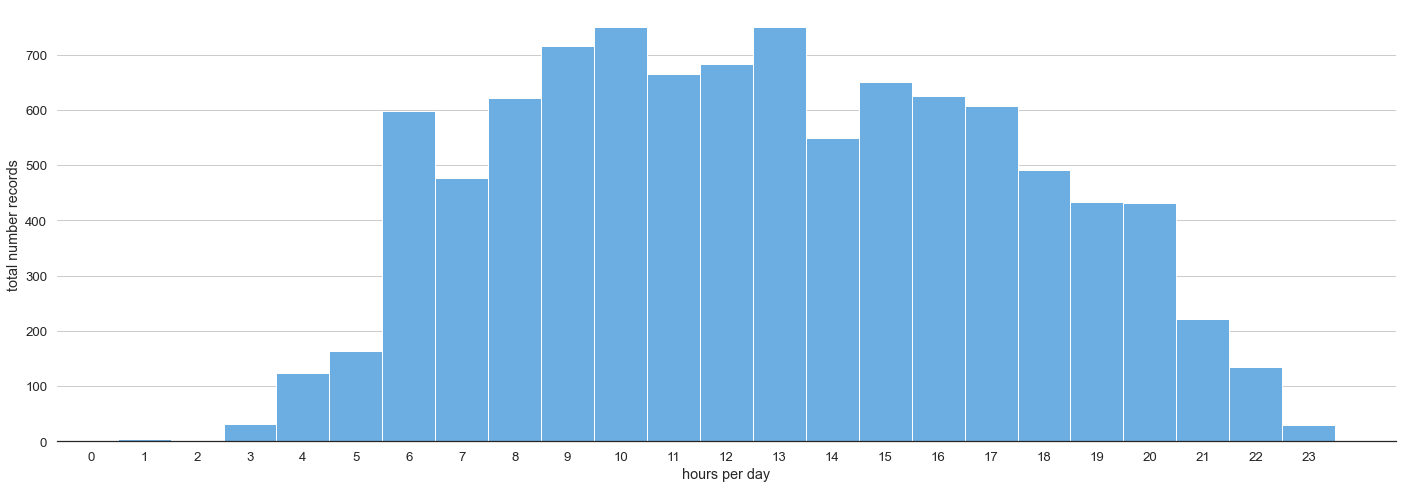

In [56]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang**

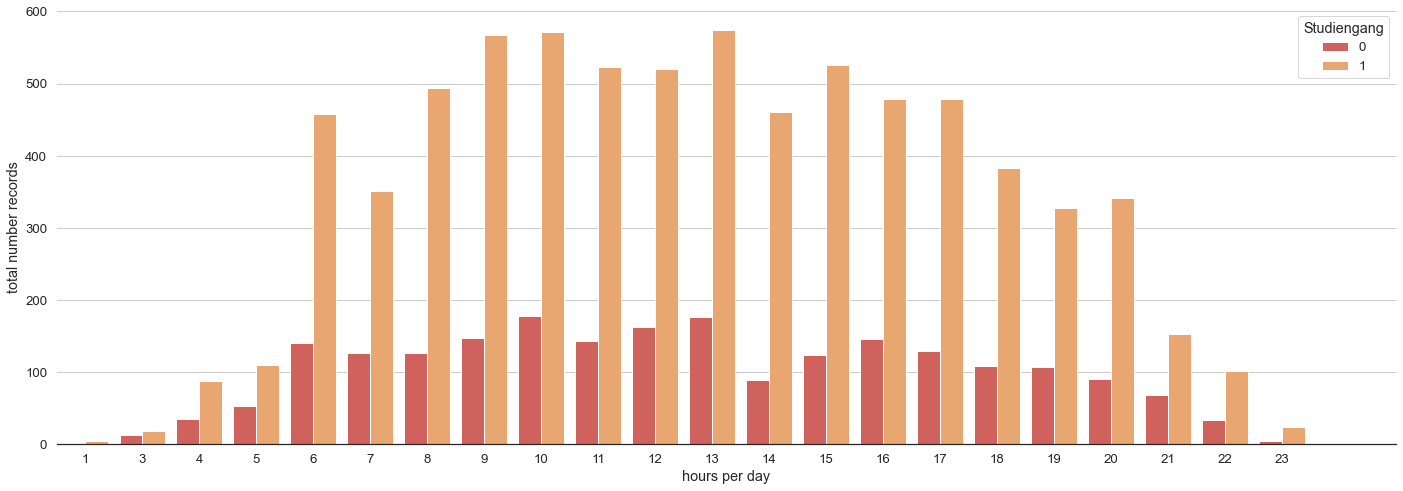

In [57]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden**

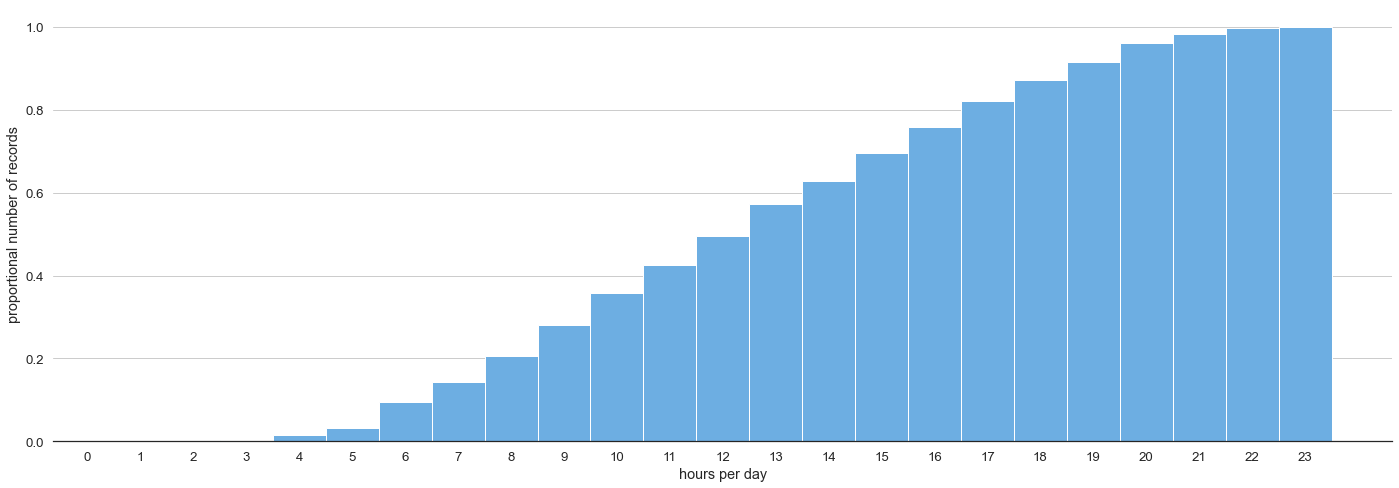

In [58]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden**

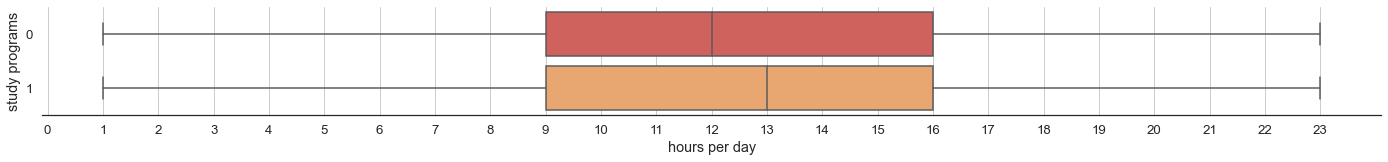

In [59]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden**

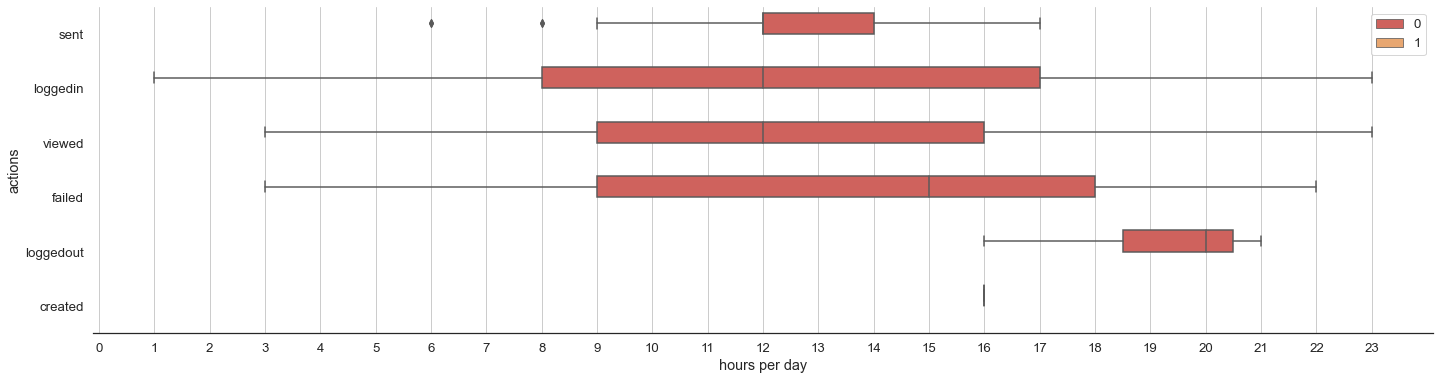

In [60]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Wochentag

In [61]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

535944    0
98771     0
98770     0
98769     0
98768     0
         ..
837517    6
837516    6
837515    6
837523    6
571553    6
Name: timecreated, Length: 9756, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag**

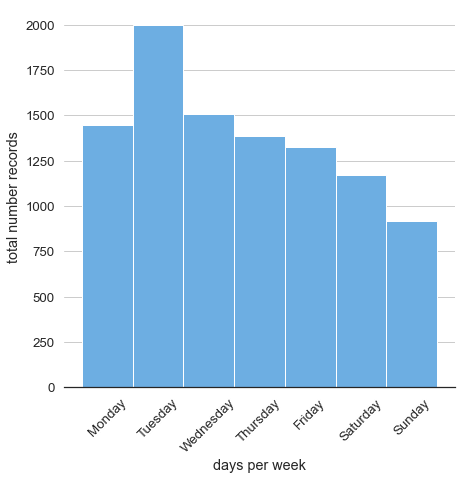

In [62]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang**

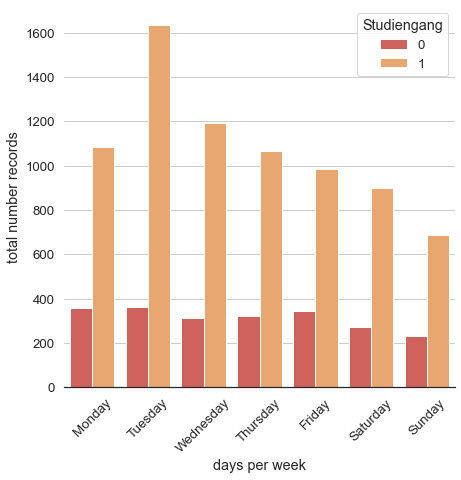

In [63]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage**

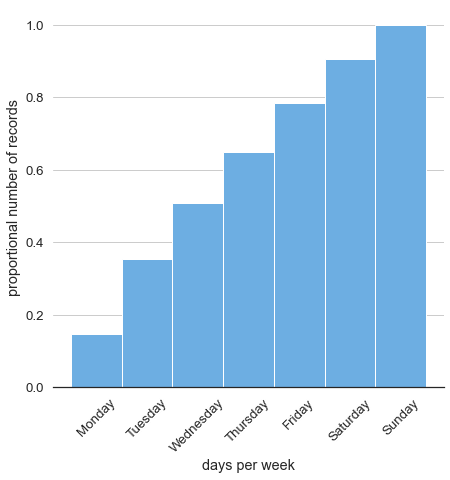

In [64]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage**

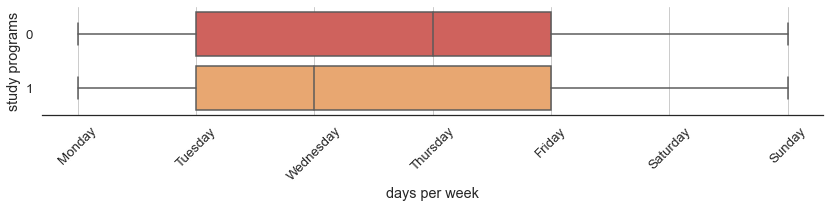

In [65]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage**

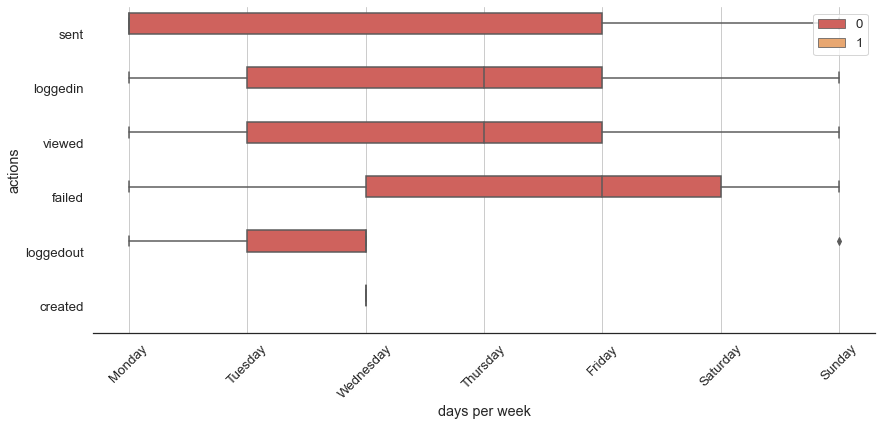

In [66]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()